# Create ROC Curves

- Contains results from baseline linear SVM, RFEST, and random chance (0.5)

In [1]:
# install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interp

from sklearn.svm import SVC
from sklearn.svm.libsvm import predict_proba
from sklearn import model_selection, preprocessing
from sklearn.metrics import (precision_score, recall_score, f1_score, 
precision_recall_fscore_support, roc_curve, auc, roc_auc_score) 
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

<H3> Linear SVM

In [2]:
df = pd.read_csv('data/cleanData/final_data.csv')
df_feature_data = df.drop(['class_label'], axis = 1)
df_feature_data = df_feature_data.values
df_label_data = df['class_label'].values

In [3]:
n_splits = 10
skf = StratifiedKFold(n_splits,random_state=1)
skf.get_n_splits(df_feature_data,df_label_data)

10

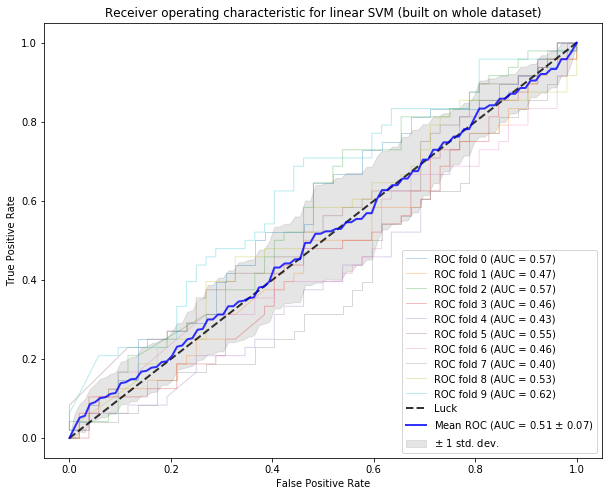


Average F1 Score: 0.46472307517445355
Average AUC: 0.5073317307692308


In [4]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'linear', probability = True, random_state = 1)
f1score_list = []
auc_df = pd.DataFrame(columns=['AUC'])
auc_df = auc_df.fillna(0)
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    svm_clf.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = svm_clf.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = svm_clf.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    auc_df.loc[count] = curr_auc

    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for linear SVM (built on whole dataset)')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/linear_svm_roc_curve.png')

print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

# save auc
auc_df.to_csv("results/baseline/linear_auc_ten_fold.csv", index = False)

<H3> RBF SVM

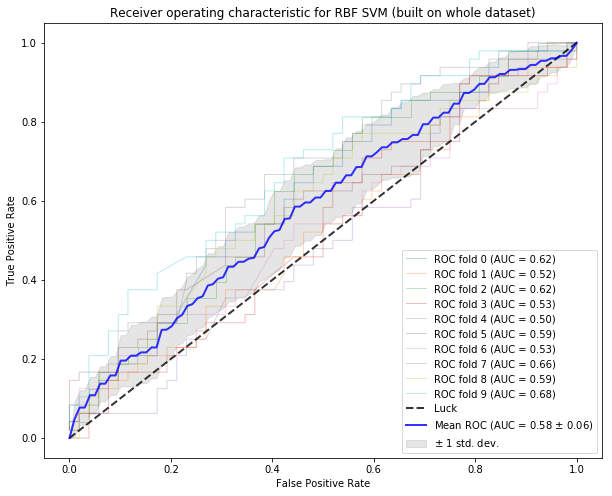


Average F1 Score: 0.4840257766114098
Average AUC: 0.5849158653846154


In [5]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'rbf', probability = True, random_state = 1)
f1score_list = []
auc_df = pd.DataFrame(columns=['AUC'])
auc_df = auc_df.fillna(0)
auc_list = []
tpr_linear = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_feature_data, df_label_data):
    # train and test model
    svm_clf.fit(df_feature_data[train_index],df_label_data[train_index])
    y_pred_prob = svm_clf.predict_proba(df_feature_data[test_index])[:,1]
    y_pred_bin = svm_clf.predict(df_feature_data[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_linear.append(interp(mean_fpr, fpr, tpr)) 
    tpr_linear[-1][0] = 0.0
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    auc_df.loc[count] = curr_auc

    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    
    count = count + 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_linear, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_linear, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RBF SVM (built on whole dataset)')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/baseline/rbf_svm_roc_curve.png')

print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

# save auc
auc_df.to_csv("results/baseline/rbf_svm_auc_ten_fold.csv", index = False)

# On Final Set of Features

In [6]:
features = pd.read_csv('results/10PercentRemoval/fsListOfFeaturesRFEST8020SplitSeed1.csv')
feature_list = features['Features'].values.tolist()

# print features
print("List of Features:\n")
print_list = [print(f) for f in feature_list]

List of Features:

X15
X21


In [7]:
# load data
df = pd.read_csv('data/cleanData/final_data.csv')
df_feature_data = df.drop(['class_label'], axis = 1)

# subset df by only using feature_list
df_subset = df_feature_data[feature_list]
df_subset = df_subset.values
df_label_data = df['class_label'].values

In [8]:
n_splits = 10
skf = StratifiedKFold(n_splits,random_state=1)
skf.get_n_splits(df_subset,df_label_data)

10

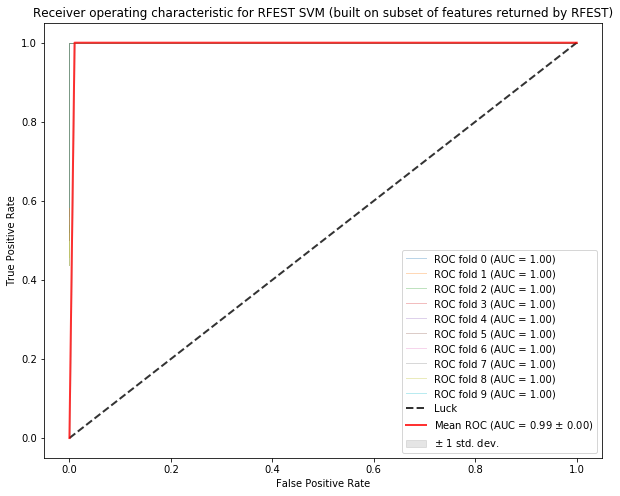


Average F1 Score: 1.0
Average AUC: 1.0


In [9]:
from sklearn import svm
svm_clf = svm.SVC(kernel = 'rbf', probability = True, random_state = 1)
f1score_list = []
auc_df = pd.DataFrame(columns=['AUC'])
auc_df = auc_df.fillna(0)
auc_list = []
tpr_rfest = []
mean_fpr = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(10,8))

count = 0
for train_index, test_index in skf.split(df_subset, df_label_data):
    # train and test model
    svm_clf.fit(df_subset[train_index],df_label_data[train_index])
    y_pred_prob = svm_clf.predict_proba(df_subset[test_index])[:,1]
    y_pred_bin = svm_clf.predict(df_subset[test_index])
    
    # compute different accuracy measurements
    f1 = f1_score(df_label_data[test_index], y_pred_bin, pos_label=1, average='binary')
    f1score_list.append(f1)

    fpr, tpr, thresholds = roc_curve(df_label_data[test_index], y_pred_prob, pos_label=1)
    tpr_rfest.append(interp(mean_fpr, fpr, tpr)) 
    tpr_rfest[-1][0] = 0.0
    
    curr_auc = auc(fpr, tpr)
    auc_list.append(curr_auc)
    auc_df.loc[count] = curr_auc
    
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (count, curr_auc))
    count = count + 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tpr_rfest, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(auc_list)
plt.plot(mean_fpr, mean_tpr, color='r',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tpr_rfest, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RFEST SVM (built on subset of features returned by RFEST)')
plt.legend(loc="lower right")
plt.show()

fig.savefig('results/10PercentRemoval/rfest_roc_curve.png')

print("\nAverage F1 Score: "+ str(sum(f1score_list)/n_splits)+
      "\nAverage AUC: "+ str(sum(auc_list)/n_splits))

# save auc
auc_df.to_csv("results/10PercentRemoval/rfest_ten_fold.csv", index = False)